In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Direkt pandas DataFrame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


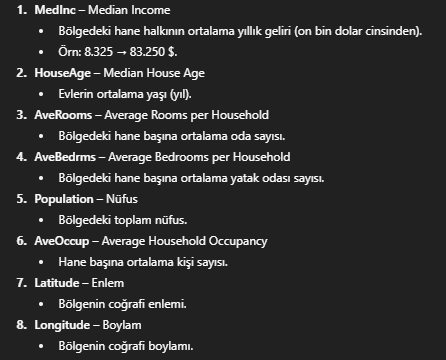

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


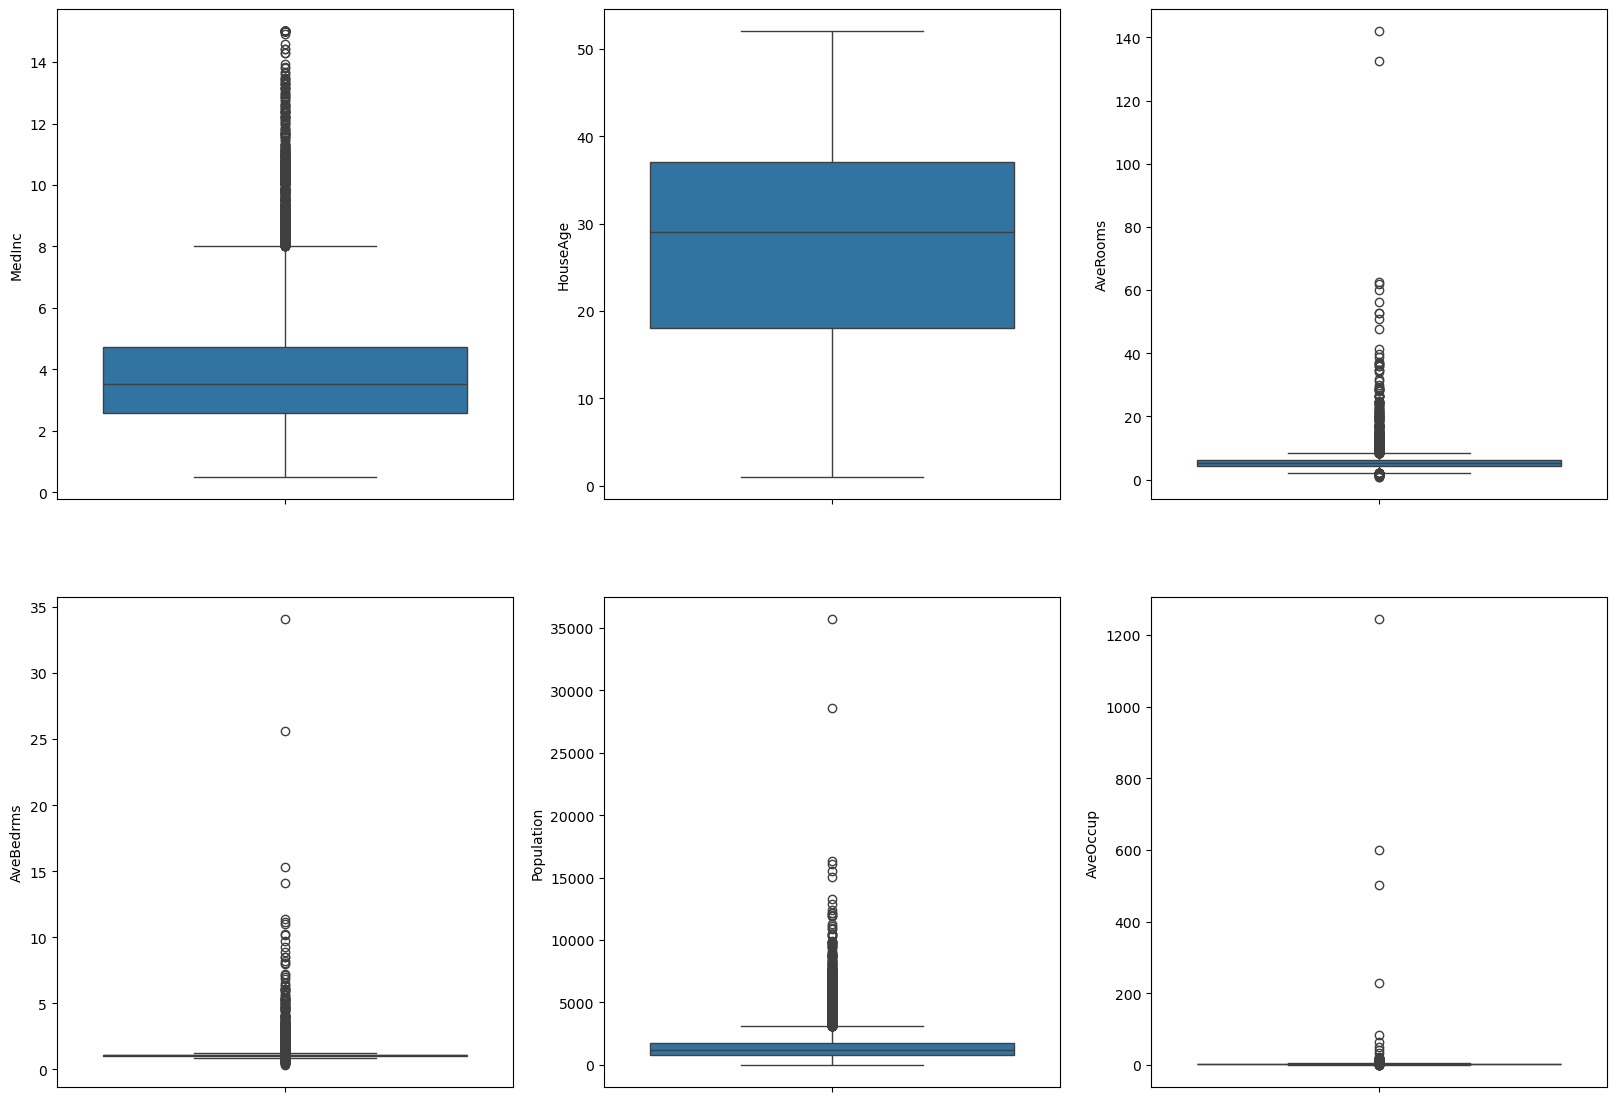

In [6]:
plt.figure(figsize=(20,14))

plt.subplot(2, 3, 1)
sns.boxplot(df['MedInc'])

plt.subplot(2, 3, 2)
sns.boxplot(df['HouseAge'])

plt.subplot(2, 3, 3)
sns.boxplot(df['AveRooms'])

plt.subplot(2, 3, 4)
sns.boxplot(df['AveBedrms'])

plt.subplot(2, 3, 5)
sns.boxplot(df['Population'])

plt.subplot(2, 3, 6)
sns.boxplot(df['AveOccup'])

plt.show()

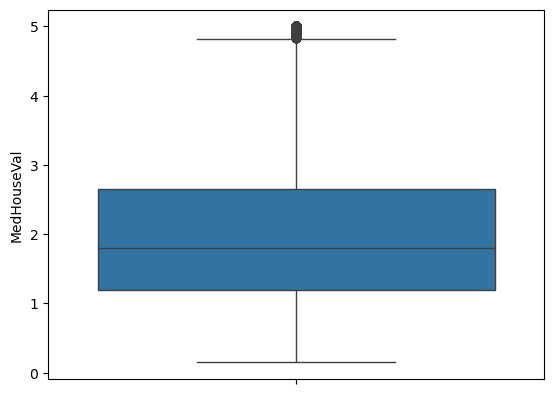

In [7]:
sns.boxplot(df['MedHouseVal'])

plt.show()

In [8]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [9]:
columns = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

df_clean = df.copy()

for col in columns:
    df_clean = remove_outliers(df_clean,col)

In [10]:
df.shape

(20640, 9)

In [11]:
df_clean.shape

(16813, 9)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [13]:
X = df_clean.drop('MedHouseVal', axis=1)
y = df_clean['MedHouseVal']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [18]:
y_pred = linear.predict(X_test_scaled)
print("R2 : ", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 :  0.6250483397459952
Mean Squared Error: 0.43452114148692533
Mean Absolute Error: 0.4883364499175635


# Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
poly = PolynomialFeatures()

In [21]:
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [22]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
print("R2 : ", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 :  0.6933154795613528
Mean Squared Error: 0.355408235309842
Mean Absolute Error: 0.4212634048099778


# SVM Regressior

In [23]:
from sklearn.svm import SVR

In [24]:
svr = SVR(kernel = 'rbf', C=10, gamma='scale')

In [25]:
svr.fit(X_train_scaled, y_train)

SVR(C=10)

In [26]:
y_pred = svr.predict(X_test_scaled)
print("R2 : ", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 :  0.7430903086996811
Mean Squared Error: 0.2977255581352659
Mean Absolute Error: 0.3640945900095232


# KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
param_grid = {
    'n_neighbors' : [3,4,5,6,7,8,9,10],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [29]:
gridKNN = GridSearchCV(estimator= KNeighborsRegressor(), param_grid=param_grid, cv=5,refit=True)

In [30]:
gridKNN.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [31]:
gridKNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

In [32]:
knn = KNeighborsRegressor(algorithm='auto', n_neighbors=10, weights='distance')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [33]:
y_pred = knn.predict(X_test_scaled)
print("R2 : ", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 :  0.6703845792150355
Mean Squared Error: 0.3819822235062265
Mean Absolute Error: 0.43652389792125973


# Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
param_grid = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : [3,5,10,15,20,25,30,40,50, None],
    'max_features' : ['sqrt', 'log2']
}

In [36]:
gridTree = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, refit=True, verbose=3)

In [37]:
gridTree.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=sqrt;, score=0.402 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=sqrt;, score=0.315 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, max_features=sqrt;, score=0.227 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3, max_features=sqrt;, score=0.334 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=3, max_features=sqrt;, score=0.385 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=3, max_features=log2;, score=0.440 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=3, max_features=log2;, score=0.350 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=3, max_features=log2;, score=0.404 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=3, max_features=log2;, score=0.262 total time=   0.0s
[CV 5/5] END criteri

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50, None],
                         'max_features': ['sqrt', 'log2']},
             verbose=3)

In [38]:
gridTree.best_params_

{'criterion': 'poisson', 'max_depth': 10, 'max_features': 'log2'}

In [39]:
tree_model = DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2')
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2')

In [40]:
y_pred = tree_model.predict(X_test)
print("R2 : ", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R2 :  0.6201039376763078
Mean Squared Error: 0.440251072726156
Mean Absolute Error: 0.4530113519410101
